<a href="https://colab.research.google.com/github/islakldavies/QM2/blob/main/COPY(2nd_draft1)_asylum_seekers_receiving_support_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount google drive in colab

In [11]:
import os
import pandas as pd

#df = pd.read_excel(
  #  "/content/drive/MyDrive/Prifysgol_UCL/2nd Year Modules/1 QM II/QM II PROJECT/Copy support-local-authority-datasets-sep-2025.xlsx",
  #  sheet_name="Data_Asy_D11_2020_2025",
  #  engine="openpyxl"
#)

df = pd.read_excel(
    "/content/Copy support-local-authority-datasets-sep-2025 (2).xlsx",
    sheet_name="Data_Asy_D11",
    header=1,
    engine="openpyxl"
)
df.head()

,Date (as at…),Quarter,Year-Quarter,Support Type,UK Region / Nation,Local Authority,LAD Code,Accommodation Type,People
0,2014-03-31,Q1,2014 Q1,Section 4,N/A - Section 4 (pre-2018),N/A - Section 4 (pre-2018),N/A - Section 4 (pre-2018),Dispersal Accommodation,4854
1,2014-03-31,Q1,2014 Q1,Section 95,East Midlands,Amber Valley,E07000032,Subsistence Only,1
2,2014-03-31,Q1,2014 Q1,Section 95,East Midlands,Bassetlaw,E07000171,Subsistence Only,4
3,2014-03-31,Q1,2014 Q1,Section 95,East Midlands,Blaby,E07000129,Subsistence Only,1
4,2014-03-31,Q1,2014 Q1,Section 95,East Midlands,Broxtowe,E07000172,Dispersal Accommodation,7


In [12]:
#check the data types
df.dtypes

,0
Date (as at…),datetime64[ns]
Quarter,object
Year-Quarter,object
Support Type,object
UK Region / Nation,object
Local Authority,object
LAD Code,object
Accommodation Type,object
People,int64


In [13]:
#change the data types accordingly so we can work with the data usign pandas
df['Quarter']=df['Quarter'].astype('category')
df['Local Authority']=df['Local Authority'].astype('category')
df['UK Region / Nation']=df['UK Region / Nation'].astype('category')
df['LAD Code']=df['LAD Code'].astype('string')
df['Accommodation Type']=df['Accommodation Type'].astype('category')
df['People']=df['People'].astype('int64')

In [14]:
#rename the columns to make things easier later
df = df.rename(columns={
    "Date (as at…)": "date",
    "Quarter": "quarter",
    "Year-Quarter": "year_quarter",
    "Support Type": "support_type",
    "UK Region / Nation": "region",
    "Local Authority": "local_authority",
    "LAD Code": "lad_code",
    "Accommodation Type": "accommodation_type",
    "People": "people"
})

In [15]:
#convert the date column
df["date"] = pd.to_datetime(df["date"], errors="coerce")

#check it worked
df["date"].min(), df["date"].max()

#create proper quarterly time variable
df["year_quarter"] = df["date"].dt.to_period("Q")

In [16]:
#accommodation_map = {
    # Subsistence-only variants
#"Subsistence Only": "Subsistence Only",
 #   "Subsistence only": "Subsistence Only",
 #   "N/A - Section 98 (pre-2023)": "Subsistence Only",

    # Initial
 #   "Initial Accommodation": "Initial Accommodation",

    # Dispersal
 #   "Dispersal Accommodation": "Dispersal Accommodation",

    # Contingency (collapse hotel + other)
   # "Contingency Accommodation - Hotel": "Contingency Accommodation",
  #  "Contingency Accommodation - Other": "Contingency Accommodation",

    # Other
 #   "Other Accommodation": "Other Accommodation",
#}

#df["accommodation_type_clean"] = (
    #df["accommodation_type"]
   #   .map(accommodation_map)
#)


In [17]:
#map with 'other' merged with contingency
accommodation_map = {
    # Subsistence-only variants
    "Subsistence Only": "Subsistence Only",
    "Subsistence only": "Subsistence Only",
    "N/A - Section 98 (pre-2023)": "Subsistence Only",

    # Initial accommodation
    "Initial Accommodation": "Initial Accommodation",

    # Dispersal (long-term, normalised)
    "Dispersal Accommodation": "Dispersal Accommodation",

    # Contingency + alternatives to hotels
    "Contingency Accommodation - Hotel": "Contingency Accommodation",
    "Contingency Accommodation - Other": "Contingency Accommodation",
    "Other Accommodation": "Contingency Accommodation",
}
df["accommodation_type_clean"] = df["accommodation_type"].map(accommodation_map)


In [18]:
df["accommodation_type_clean"].value_counts()


,count
accommodation_type_clean,
Dispersal Accommodation,12734
Subsistence Only,9322
Contingency Accommodation,3819
Initial Accommodation,260


In [19]:
df.head()

,date,quarter,year_quarter,support_type,region,local_authority,lad_code,accommodation_type,people,accommodation_type_clean
0,2014-03-31,Q1,2014Q1,Section 4,N/A - Section 4 (pre-2018),N/A - Section 4 (pre-2018),N/A - Section 4 (pre-2018),Dispersal Accommodation,4854,Dispersal Accommodation
1,2014-03-31,Q1,2014Q1,Section 95,East Midlands,Amber Valley,E07000032,Subsistence Only,1,Subsistence Only
2,2014-03-31,Q1,2014Q1,Section 95,East Midlands,Bassetlaw,E07000171,Subsistence Only,4,Subsistence Only
3,2014-03-31,Q1,2014Q1,Section 95,East Midlands,Blaby,E07000129,Subsistence Only,1,Subsistence Only
4,2014-03-31,Q1,2014Q1,Section 95,East Midlands,Broxtowe,E07000172,Dispersal Accommodation,7,Dispersal Accommodation


In [20]:
df.describe()

,date,people
count,26135,26135.000000
mean,2021-06-20 14:09:43.768892416,120.725961
min,2014-03-31 00:00:00,1.000000
25%,2018-12-31 00:00:00,4.000000
50%,2022-03-31 00:00:00,16.000000
75%,2024-03-31 00:00:00,79.000000
max,2025-09-30 00:00:00,37142.000000
std,NaN,500.345900


In [21]:
#get rid of the national level data and put it into a new dataframe
df = df[~df["lad_code"].str.startswith("N/A", na=False)].copy()
df_national = df[df["lad_code"].isna() | df["lad_code"].str.startswith("N/A", na=False)]

In [22]:
df_national.head()

,date,quarter,year_quarter,support_type,region,local_authority,lad_code,accommodation_type,people,accommodation_type_clean
230,2014-03-31,Q1,2014Q1,Section 95,Unknown,Unknown,<NA>,Dispersal Accommodation,133,Dispersal Accommodation
231,2014-03-31,Q1,2014Q1,Section 95,Unknown,Unknown,<NA>,Subsistence Only,25,Subsistence Only
531,2014-06-30,Q2,2014Q2,Section 95,Unknown,Unknown,<NA>,Dispersal Accommodation,127,Dispersal Accommodation
532,2014-06-30,Q2,2014Q2,Section 95,Unknown,Unknown,<NA>,Subsistence Only,26,Subsistence Only
853,2014-09-30,Q3,2014Q3,Section 95,Unknown,Unknown,<NA>,Dispersal Accommodation,124,Dispersal Accommodation


In [23]:
df["date"] = pd.PeriodIndex(df["date"], freq="Q").to_timestamp()

# Sort
df = df.sort_values("date")

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date is datetime
df["date"] = pd.to_datetime(df["date"])

# Filter period of interest
df_plot = df[(df["date"] >= "2019-01-01") & (df["date"] <= "2025-12-31")]

In [25]:
national = (
    df_plot
    .groupby(["date", "accommodation_type_clean"])["people"]
    .sum()
    .reset_index()
)

In [26]:
pivot = national.pivot(
    index="date",
    columns="accommodation_type_clean",
    values="people"
)

# Sort chronologically (important!)
pivot = pivot.sort_index()

<Figure size 1400x800 with 0 Axes>

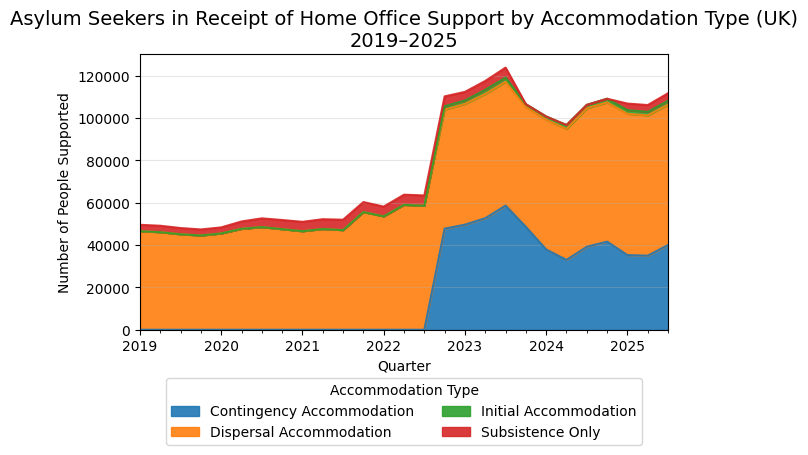

In [27]:
plt.figure(figsize=(14,8))

pivot.plot.area(stacked=True, alpha=0.9)

plt.title(
    "Asylum Seekers in Receipt of Home Office Support by Accommodation Type (UK)\n2019–2025",
    fontsize=14
)
plt.xlabel("Quarter")
plt.ylabel("Number of People Supported")
plt.legend(
    title="Accommodation Type",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=2
)

plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

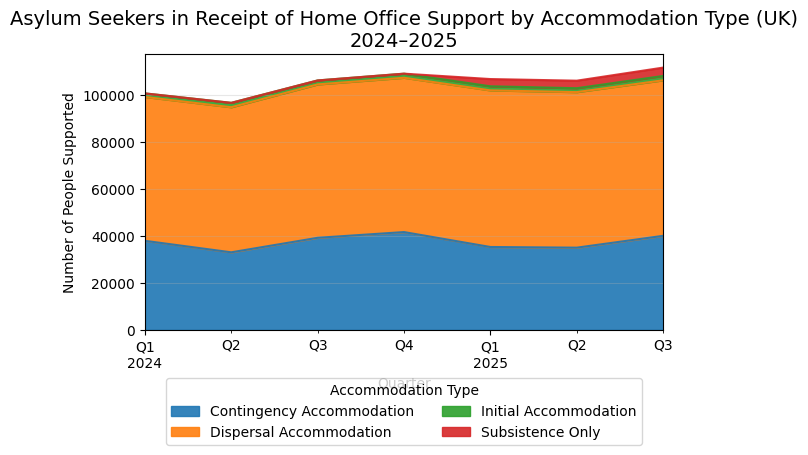

In [28]:
# Filter to 2024–2025 only
pivot_2425 = pivot.loc["2024-01-01":"2025-12-31"]

plt.figure(figsize=(14,8))
pivot_2425.plot.area(stacked=True, alpha=0.9)

plt.title(
    "Asylum Seekers in Receipt of Home Office Support by Accommodation Type (UK)\n2024–2025",
    fontsize=14
)
plt.xlabel("Quarter")
plt.ylabel("Number of People Supported")
plt.legend(
    title="Accommodation Type",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=2
)
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

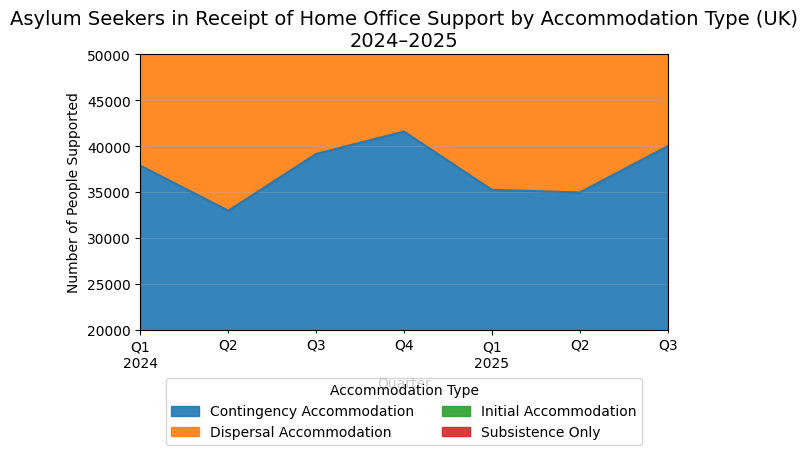

In [29]:
plt.figure(figsize=(14,8))
pivot_2425.plot.area(stacked=True, alpha=0.9)

plt.title(
    "Asylum Seekers in Receipt of Home Office Support by Accommodation Type (UK)\n2024–2025",
    fontsize=14
)
plt.xlabel("Quarter")
plt.ylabel("Number of People Supported")
plt.legend(
    title="Accommodation Type",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=2
)
plt.grid(axis="y", alpha=0.3)

# Set y-axis limit
plt.ylim(20000, 50000)

plt.tight_layout()
plt.show()

In [30]:
# Convert counts to proportions (row-wise)
pivot_prop = pivot_2425.div(pivot_2425.sum(axis=1), axis=0) * 100

<Figure size 1400x800 with 0 Axes>

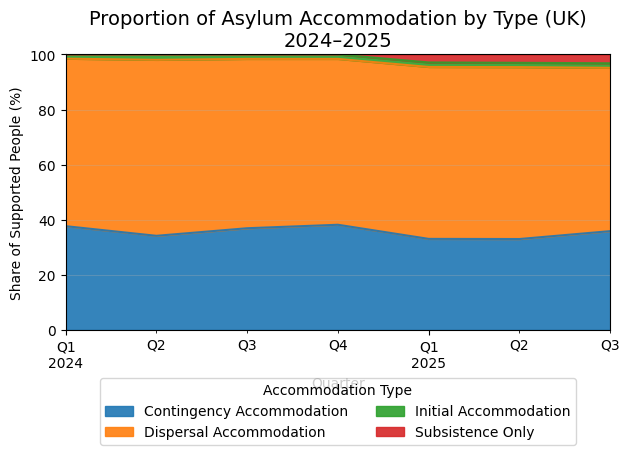

In [31]:
plt.figure(figsize=(14,8))
pivot_prop.plot.area(stacked=True, alpha=0.9)

plt.title("Proportion of Asylum Accommodation by Type (UK)\n2024–2025", fontsize=14)
plt.xlabel("Quarter")
plt.ylabel("Share of Supported People (%)")
plt.legend(
    title="Accommodation Type",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=2
)
plt.grid(axis="y", alpha=0.3)

plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [32]:
#df = pd.read_excel(
#    "/content/Copy support-local-authority-datasets-sep-2025 (3).xlsx",
#    sheet_name="population_per_LA",
#    header=1,
#    engine="openpyxl"
#)
#df.head()

In [33]:
# Ensure date is datetime
df["date"] = pd.to_datetime(df["date"])

# Aggregate LA × quarter × accommodation type
la_quarter = (
    df.groupby(["local_authority", "date", "accommodation_type_clean"])["people"]
      .sum()
      .reset_index()
)

# Pivot accommodation types wide
la_pivot = la_quarter.pivot_table(
    index=["local_authority", "date"],
    columns="accommodation_type_clean",
    values="people",
    fill_value=0
).reset_index()


/tmp/ipython-input-1902312799.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["local_authority", "date", "accommodation_type_clean"])["people"]
/tmp/ipython-input-1902312799.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  la_pivot = la_quarter.pivot_table(


In [34]:
# Total supported per LA-quarter
accom_cols = [c for c in la_pivot.columns if c not in ["local_authority", "date"]]
la_pivot["total_supported"] = la_pivot[accom_cols].sum(axis=1)

# Contingency share (%)
la_pivot["contingency_share"] = (
    la_pivot["Contingency Accommodation"] / la_pivot["total_supported"]
) * 100

In [35]:
df_protests = pd.read_excel(
    "/content/QM2 Project protests data (1).xlsx",
    sheet_name="2025",
    engine="openpyxl"
)
df_protests.head()

,event_id,date,location_name,town_city,postcode,description,v,wiki ref,source,source_url
0,E0001,2025-04-13,Hotel used to house asylum seekers,Paisley,PA1 1DD,Protest by 'Fighting Justice Against Predators...,NaN,44,Morning Star,https://morningstaronline.co.uk/article/far-ri...
1,E0002,2025-04-15,Rally (mass-deportations),Portsmouth,PO1 2AB,UKIP rally; Nick Tenconi attended; counter-pro...,NaN,46,The News,https://www.portsmouth.co.uk/news/people/ports...
2,E0003,2025-04-27,Town centre → Market Square march,Dover,CT16 1NU,'Kent Motor Heads' anti-illegal-immigration pr...,NaN,47,BBC News,https://www.bbc.com/news/articles/cy4j4pdrj3eo
3,E0004,2025-05-17,City centre march → Victoria Square,Birmingham,B11BD,Britain First supporters marched; council said...,NaN,49,Birmingham Mail,https://www.birminghammail.co.uk/news/midlands...
4,E0005,2025-05-17,City centre rally (mass-deportations),Bristol,BS1 4SB,UKIP rally (~100) opposed by larger counter-pr...,NaN,51,Bristol Live,https://www.bristolpost.co.uk/news/bristol-new...


In [36]:
df_protests.loc[df_protests["postcode"] == "B11BD", "postcode"] = "B1 1BD"
df_protests.loc[df_protests["postcode"] == "1 1JW", "postcode"] = "L1 1JW"

In [37]:
df_protests.loc[df_protests["postcode"] == "1 1JW", "postcode"] = "L1 1JW"

In [39]:
!pip install pgeocode

import pgeocode
geo = pgeocode.Nominatim("gb")

df_protests["postcode"] = (
    df_protests["postcode"]
    .astype(str)
    .str.upper()
    .str.strip()
)

coords = df_protests["postcode"].apply(geo.query_postal_code)

df_protests["latitude"] = coords["latitude"]
df_protests["longitude"] = coords["longitude"]

df_protests = df_protests.dropna(subset=["latitude", "longitude"])

In [40]:
import geopandas as gpd
from shapely.geometry import Point

# Create geometry column from lat/lon
geometry = [Point(xy) for xy in zip(df_protests["longitude"], df_protests["latitude"])]

gdf = gpd.GeoDataFrame(df_protests, geometry=geometry, crs="EPSG:4326")

In [43]:
uk_map = gpd.read_file("/content/LAD_MAY_2025_UK_BFC_V2_481919774574330966 (2).geojson")

In [44]:
uk_map = uk_map.to_crs(epsg=4326)

In [46]:
gdf_with_la = gpd.sjoin(
    gdf,
    uk_map,
    how="left",
    predicate="within"
)

uk_map.columns

Index(['FID', 'LAD25CD', 'LAD25NM', 'LAD25NMW', 'BNG_E', 'BNG_N', 'LONG',
       'LAT', 'GlobalID', 'geometry'],
      dtype='object')

In [47]:
gdf_with_la["local_authority"] = gdf_with_la["LAD25NM"]

In [48]:
gdf_with_la[["event_id", "town_city", "postcode", "local_authority"]].head()

,event_id,town_city,postcode,local_authority
0,E0001,Paisley,PA1 1DD,Renfrewshire
1,E0002,Portsmouth,PO1 2AB,Portsmouth
2,E0003,Dover,CT16 1NU,Dover
3,E0004,Birmingham,B1 1BD,Birmingham
4,E0005,Bristol,BS1 4SB,"Bristol, City of"


In [49]:
gdf_with_la.drop(columns="geometry").to_excel("/content/QM2 Project protests data (1).xlsx", index=False)

In [59]:
protests = pd.read_excel(
    "/content/QM2 Project protests data (1).xlsx",
    engine="openpyxl"
)
protests["date"] = pd.to_datetime(protests["date"])

# Convert daily protest dates to quarter-start dates to match la_pivot's date format
protests["date"] = protests["date"].dt.to_period("Q").dt.start_time

# Aggregate protest counts per local_authority and date
protest_counts = protests.groupby(["local_authority", "date"]).size().reset_index(name="num_protests")

# Merge protest_counts with la_pivot
# Use a left merge to keep all LA-quarter data from la_pivot, filling NaNs with 0 for num_protests
panel = la_pivot.merge(
    protest_counts,
    on=["local_authority", "date"],
    how="left" # Use left merge to keep all LA-quarter data and potentially fill 0 for no protests
)

# Fill NaN protest counts with 0, as there were no protests in those LA-quarters
panel["num_protests"] = panel["num_protests"].fillna(0)


In [61]:
panel_2025 = panel.reset_index()

panel_2025 = panel_2025[
    (panel_2025["date"] >= "2025-01-01") &
    (panel_2025["date"] <= "2025-12-31")
]

panel_2025 = panel_2025.set_index(["local_authority", "date"])

In [65]:
!pip install linearmodels

from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# panel_2025 is already set with a MultiIndex in the previous cell,
# so this line is no longer needed.
# panel_2025 = panel_2025.set_index(["local_authority", "date"])

# Dependent variable (now numerical: count of protests)
y = panel_2025["num_protests"]

# Independent variable
X = panel_2025[["contingency_share"]]
X = sm.add_constant(X)

# Fixed effects model: LA FE + Time FE
model_2025 = PanelOLS(
    y,
    X,
    entity_effects=True,   # Local Authority FE
    time_effects=True     # Quarter FE
)

results = model_2025.fit(cov_type="clustered", cluster_entity=True)
print(results.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:           num_protests   R-squared:                        0.0069
Estimator:                   PanelOLS   R-squared (Between):             -0.3899
No. Observations:                1006   R-squared (Within):               0.0075
Date:                Sun, Jan 11 2026   R-squared (Overall):             -0.1299
Time:                        12:17:43   Log-likelihood                   -644.33
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      4.5973
Entities:                         345   P-value                           0.0324
Avg Obs:                       2.9159   Distribution:                   F(1,658)
Min Obs:                       1.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             0.5364
                            

/usr/local/lib/python3.12/dist-packages/linearmodels/panel/model.py:1258: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [53]:
for col in df_protests.columns:
    print(f"'{col}'")

'event_id'
'date'
'location_name'
'town_city'
'postcode'
'description'
'v'
'wiki ref'
'source'
'source_url'
'latitude'
'longitude'


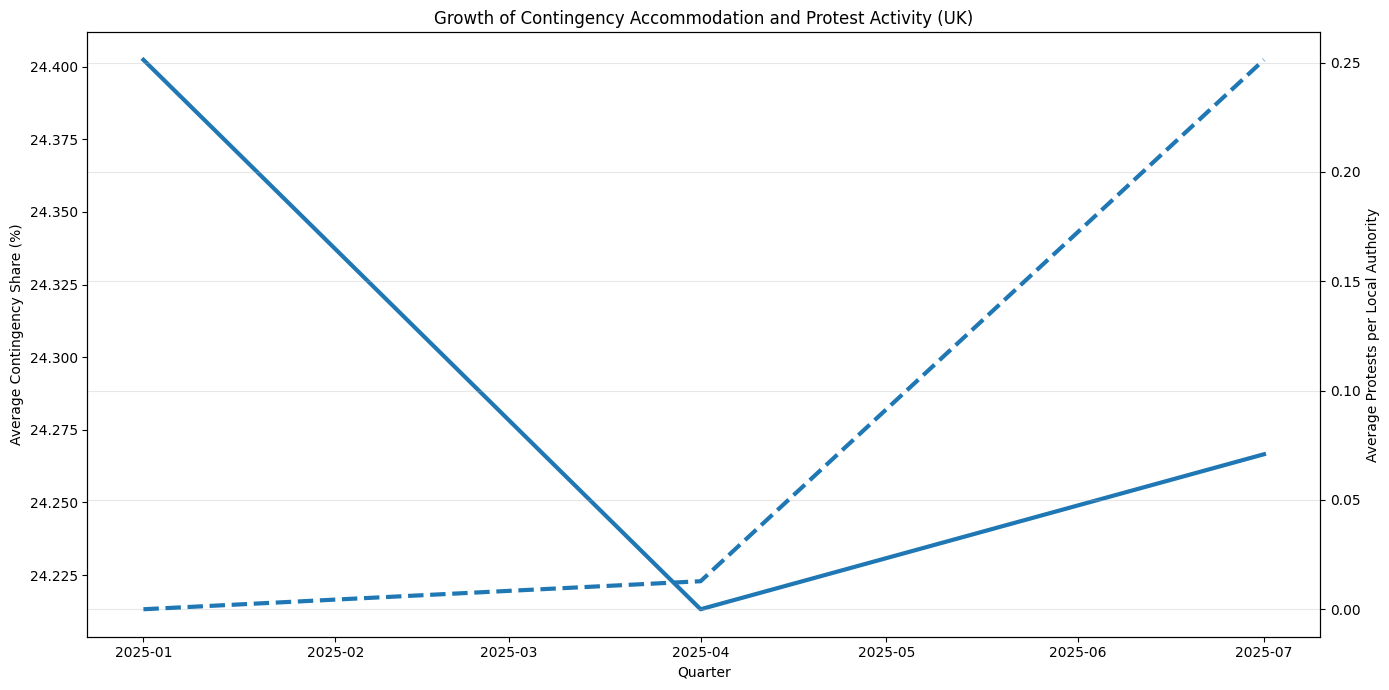

In [67]:
import matplotlib.pyplot as plt

# Average across all councils by quarter
avg = panel_2025.reset_index().groupby("date")[["contingency_share", "num_protests"]].mean()

fig, ax1 = plt.subplots(figsize=(14,7))

# Contingency share (left axis)
ax1.plot(avg.index, avg["contingency_share"], linewidth=3)
ax1.set_ylabel("Average Contingency Share (%)")
ax1.set_xlabel("Quarter")

# Protests (right axis)
ax2 = ax1.twinx()
ax2.plot(avg.index, avg["num_protests"], linewidth=3, linestyle="--")
ax2.set_ylabel("Average Protests per Local Authority")

plt.title("Growth of Contingency Accommodation and Protest Activity (UK)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

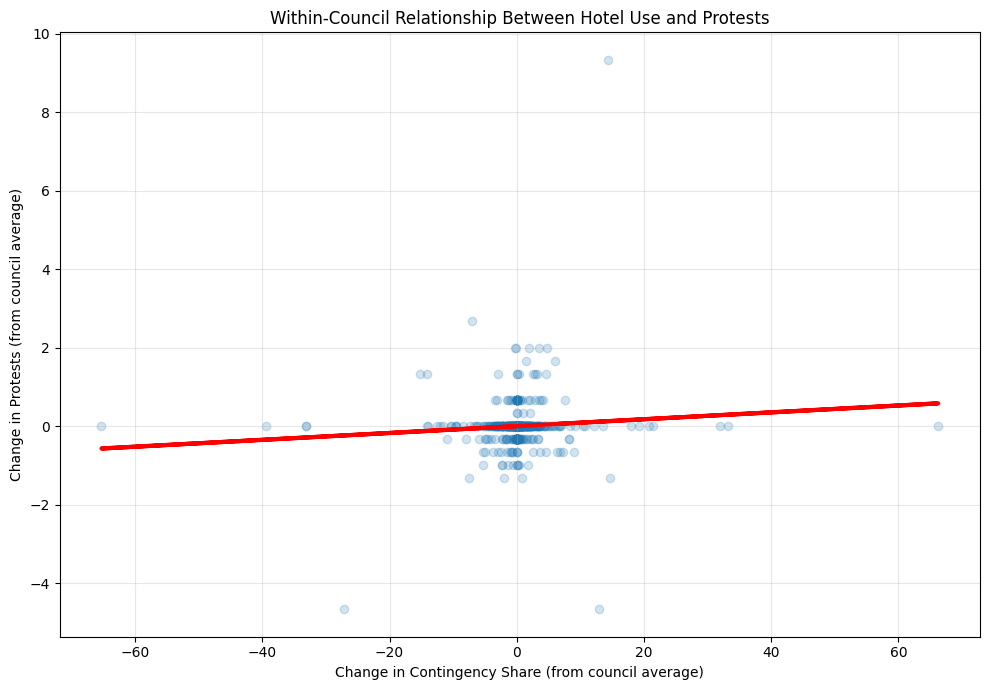

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Demean within councils (fixed-effects transformation)
df_fe = panel_2025.reset_index().copy()

df_fe["contingency_dm"] = (
    df_fe["contingency_share"] -
    df_fe.groupby("local_authority")["contingency_share"].transform("mean")
)

df_fe["protests_dm"] = (
    df_fe["num_protests"] -
    df_fe.groupby("local_authority")["num_protests"].transform("mean")
)

plt.figure(figsize=(10,7))
plt.scatter(df_fe["contingency_dm"], df_fe["protests_dm"], alpha=0.2)

# Filter out data points where contingency_dm has no variation within a local_authority group
# This ensures that polyfit receives data with sufficient variance.
# Calculate standard deviation of contingency_dm for each local_authority
std_dev_contingency = df_fe.groupby("local_authority")["contingency_dm"].std()

# Get a list of local authorities with non-zero standard deviation
# Using a small tolerance to account for potential floating point inaccuracies
valid_las = std_dev_contingency[std_dev_contingency > 1e-9].index

# Filter df_fe to include only valid local authorities
df_fe_filtered = df_fe[df_fe["local_authority"].isin(valid_las)]

# Check if df_fe_filtered is not empty and has enough unique x-values for polyfit
if len(df_fe_filtered) > 1 and df_fe_filtered["contingency_dm"].nunique() > 1:
    # Regression line
    m, b = np.polyfit(df_fe_filtered["contingency_dm"], df_fe_filtered["protests_dm"], 1)
    plt.plot(df_fe_filtered["contingency_dm"], m*df_fe_filtered["contingency_dm"] + b, color='red', linewidth=3, label='Regression Line')
else:
    print("Not enough variation in 'contingency_dm' to fit a regression line after filtering.")

plt.xlabel("Change in Contingency Share (from council average)")
plt.ylabel("Change in Protests (from council average)")
plt.title("Within-Council Relationship Between Hotel Use and Protests")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()